<h2 style = "background-image:url('https://t1.pixers.pics/img-1fb6f67c/posterler-sari-meyveler-desen.jpg?H4sIAAAAAAAAA3VOW46DMAy8TpAAG0xi4AD97REQj9DNlkeUpLvVnn4TVf2s7JHtke0ZeBx-XDXM-gjawW6WZdOwmi1Ovnfamz8tpKxzzPrIbgIxduePdrM7rSgk5QkKOSHrf8d4uI_uLr5CsL4H8FRa84zfYpk9zLuHGisGZJCdopY6wkXxMtiteC0GM98LhU-JpT1uOabI3l4axLxJHoIzu4imzigXxLe9ZfBB8tVDvILLFagDblNKlajhcqWOW26lGpaVxknh1GhmqoiRkNdubLWeqqZe6zKq_ANn9tv0MQEAAA==');background-position: center;text-shadow: 12px 10px 4px #333;color:black;border:0;font-family:Palatino Linotype;font-weight:bold;font-size:25px;text-indent:10px">Import Library</h2>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
import cv2

# import model 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#import warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('C:/Users/TODAY/VSCode/detection_banana'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/TODAY/VSCode/detection_banana\image-classification-using-cnn-banana.ipynb
C:/Users/TODAY/VSCode/detection_banana\banana\app.py
C:/Users/TODAY/VSCode/detection_banana\banana\test\ripe_banana\ripe_banana (100).jpg
C:/Users/TODAY/VSCode/detection_banana\banana\test\ripe_banana\ripe_banana (1004).jpg
C:/Users/TODAY/VSCode/detection_banana\banana\test\ripe_banana\ripe_banana (1005).jpg
C:/Users/TODAY/VSCode/detection_banana\banana\test\ripe_banana\ripe_banana (1010).jpg
C:/Users/TODAY/VSCode/detection_banana\banana\test\ripe_banana\ripe_banana (1018).jpg
C:/Users/TODAY/VSCode/detection_banana\banana\test\ripe_banana\ripe_banana (102).jpg
C:/Users/TODAY/VSCode/detection_banana\banana\test\ripe_banana\ripe_banana (1028).jpg
C:/Users/TODAY/VSCode/detection_banana\banana\test\ripe_banana\ripe_banana (1034).jpg
C:/Users/TODAY/VSCode/detection_banana\banana\test\ripe_banana\ripe_banana (1045).jpg
C:/Users/TODAY/VSCode/detection_banana\banana\test\ripe_banana\ripe_banana (1048).jpg
C:/Us

<a id = "1" ></a>
<h2 style = "background-image:url('https://t1.pixers.pics/img-1fb6f67c/posterler-sari-meyveler-desen.jpg?H4sIAAAAAAAAA3VOW46DMAy8TpAAG0xi4AD97REQj9DNlkeUpLvVnn4TVf2s7JHtke0ZeBx-XDXM-gjawW6WZdOwmi1Ovnfamz8tpKxzzPrIbgIxduePdrM7rSgk5QkKOSHrf8d4uI_uLr5CsL4H8FRa84zfYpk9zLuHGisGZJCdopY6wkXxMtiteC0GM98LhU-JpT1uOabI3l4axLxJHoIzu4imzigXxLe9ZfBB8tVDvILLFagDblNKlajhcqWOW26lGpaVxknh1GhmqoiRkNdubLWeqqZe6zKq_ANn9tv0MQEAAA==');background-position: center;text-shadow: 12px 10px 4px #333;color:black;border:0;font-family:Palatino Linotype;font-weight:bold;font-size:25px;text-indent:10px">Load and Check Data</h2>

In [24]:
train_dir = 'C:/Users/TODAY/VSCode/detection_banana/banana/train/'
test_dir =  'C:/Users/TODAY/VSCode/detection_banana/banana/test/'

In [54]:
banana = []
banana_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        banana.append(i) # name of the banana 
        banana_image.append(i + '/' + image_filename) # image of the banana

In [55]:
train_banana = pd.DataFrame(banana, columns=["Banana"])
train_banana["Banana Image"] = banana_image

In [56]:
train_banana

,Banana,Banana Image
0,matang,matang/ripe_banana (1).jpg
1,matang,matang/ripe_banana (1000).jpg
2,matang,matang/ripe_banana (1001).jpg
3,matang,matang/ripe_banana (1002).jpg
4,matang,matang/ripe_banana (1003).jpg
...,...,...
2760,terlalu matang,terlalu matang/very_ripe banana (989).jpg
2761,terlalu matang,terlalu matang/very_ripe banana (991).jpg
2762,terlalu matang,terlalu matang/very_ripe banana (995).jpg
2763,terlalu matang,terlalu matang/very_ripe banana (997).jpg


In [58]:
from collections import Counter
newData = Counter(train_banana["Banana"])
most_fruits = newData.most_common(3)

print("The 3 category found banana in the data set and their number")
most_fruits

The 3 category found banana in the data set and their number


[('terlalu matang', 927), ('matang', 924), ('mentah', 914)]

In [59]:
x,y = zip(*most_fruits)
x,y = list(x),list(y)

In [60]:
print("The 3 category found banana in the data set and their number -- > \n ", x)

The 3 category found banana in the data set and their number -- > 
  ['terlalu matang', 'matang', 'mentah']


Visualisasi

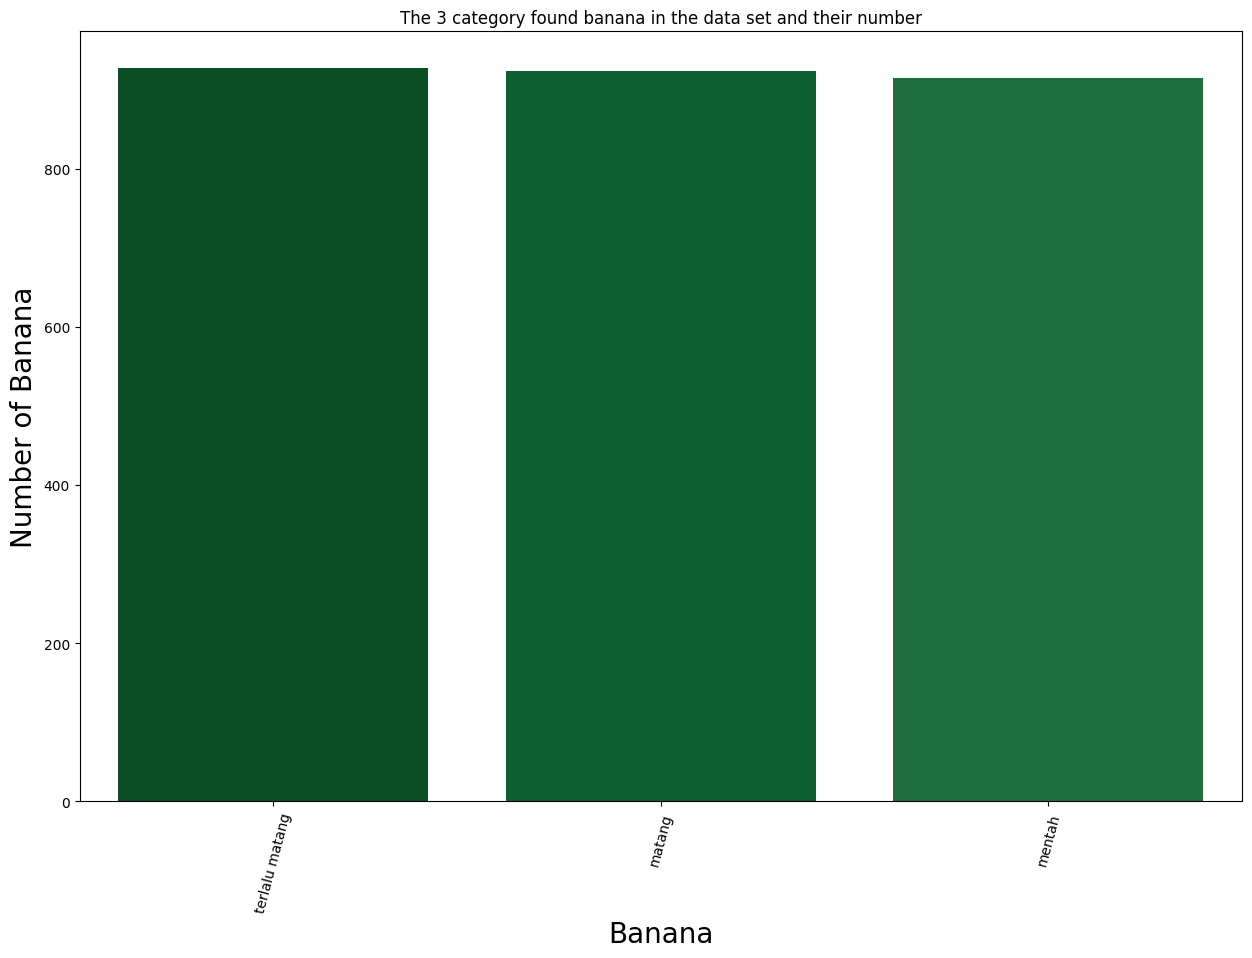

In [61]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15)) 
plt.xlabel('Banana', size = 20) 
plt.ylabel('Number of Banana', size = 20 )
plt.xticks(rotation = 75)
plt.title('The 3 category found banana in the data set and their number') 
plt.show()

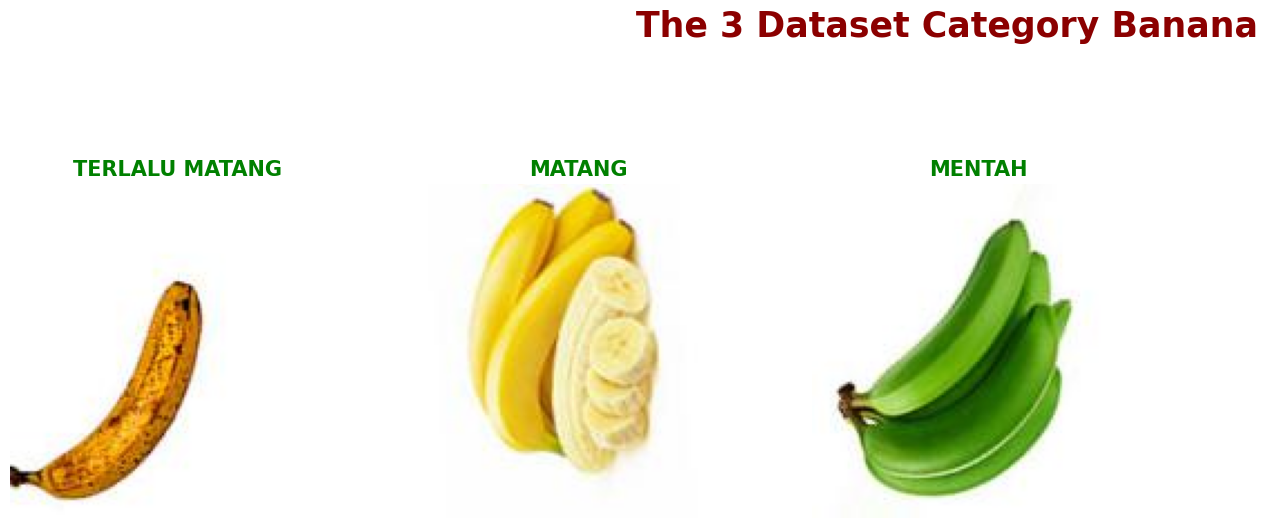

In [62]:
plt.figure(figsize=(25,16))
how_many_banana = len(x)

for i in range(how_many_banana):
    banana = train_banana[train_banana["Banana"] == x[i]]["Banana Image"].values [1]
    
    plt.subplot(3,5,i+1)
    img = load_img(train_dir + banana)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 3 Dataset Category Banana", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

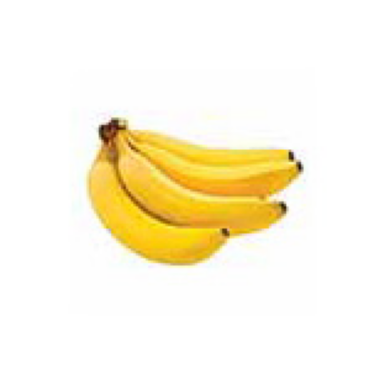

In [34]:
img = load_img(train_dir + "matang/ripe_banana (1).jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

Data Preparation

In [63]:
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

Image Shape -->  (150, 150, 3)


In [64]:
fruitCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fruitCountUnique)
print("How many different banana are there  -->  ",numberOfClass)

How many different banana are there  -->   3


<a id = "2" ></a>
<h2 style = "background-image:url('https://t1.pixers.pics/img-1fb6f67c/posterler-sari-meyveler-desen.jpg?H4sIAAAAAAAAA3VOW46DMAy8TpAAG0xi4AD97REQj9DNlkeUpLvVnn4TVf2s7JHtke0ZeBx-XDXM-gjawW6WZdOwmi1Ovnfamz8tpKxzzPrIbgIxduePdrM7rSgk5QkKOSHrf8d4uI_uLr5CsL4H8FRa84zfYpk9zLuHGisGZJCdopY6wkXxMtiteC0GM98LhU-JpT1uOabI3l4axLxJHoIzu4imzigXxLe9ZfBB8tVDvILLFagDblNKlajhcqWOW26lGpaVxknh1GhmqoiRkNdubLWeqqZe6zKq_ANn9tv0MQEAAA==');background-position: center;text-shadow: 12px 10px 4px #333;color:black;border:0;font-family:Palatino Linotype;font-weight:bold;font-size:25px;text-indent:10px">Modeling </h2>

In [65]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = array_image.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

In [66]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [67]:
epochs = 10
batch_size = 32

Data Augmentation

In [68]:
print("Target Size --> ", array_image.shape[:2])

Target Size -->  (150, 150)


In [69]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [70]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 2765 images belonging to 3 classes.


In [71]:
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 693 images belonging to 3 classes.


In [72]:
for data_batch, labels_batch in train_generator:
    print("data_batch shape --> ",data_batch.shape)
    print("labels_batch shape --> ",labels_batch.shape)
    break

data_batch shape -->  (32, 150, 150, 3)
labels_batch shape -->  (32, 3)


Fit the model  

In [73]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

Epoch 1/10
50/50 [==============================] - 176s 3s/step - loss: 1.0082 - accuracy: 0.6863 - val_loss: 0.2852 - val_accuracy: 0.8687
Epoch 2/10
50/50 [==============================] - 104s 2s/step - loss: 0.2686 - accuracy: 0.9106
Epoch 3/10
50/50 [==============================] - 137s 3s/step - loss: 0.4004 - accuracy: 0.9013
Epoch 4/10
50/50 [==============================] - 132s 3s/step - loss: 0.1874 - accuracy: 0.9581
Epoch 5/10
50/50 [==============================] - 144s 3s/step - loss: 0.2114 - accuracy: 0.9725
Epoch 6/10
50/50 [==============================] - 112s 2s/step - loss: 0.0531 - accuracy: 0.9831
Epoch 7/10
50/50 [==============================] - 105s 2s/step - loss: 0.3784 - accuracy: 0.9652
Epoch 8/10
50/50 [==============================] - 109s 2s/step - loss: 0.1102 - accuracy: 0.9794
Epoch 9/10
50/50 [==============================] - 110s 2s/step - loss: 0.1573 - accuracy: 0.9570
Epoch 10/10
50/50 [==============================] - 108s 2s/step -

<a id = "8" ></a>
<h2 style = "background-image:url('https://t1.pixers.pics/img-1fb6f67c/posterler-sari-meyveler-desen.jpg?H4sIAAAAAAAAA3VOW46DMAy8TpAAG0xi4AD97REQj9DNlkeUpLvVnn4TVf2s7JHtke0ZeBx-XDXM-gjawW6WZdOwmi1Ovnfamz8tpKxzzPrIbgIxduePdrM7rSgk5QkKOSHrf8d4uI_uLr5CsL4H8FRa84zfYpk9zLuHGisGZJCdopY6wkXxMtiteC0GM98LhU-JpT1uOabI3l4axLxJHoIzu4imzigXxLe9ZfBB8tVDvILLFagDblNKlajhcqWOW26lGpaVxknh1GhmqoiRkNdubLWeqqZe6zKq_ANn9tv0MQEAAA==');background-position: center;text-shadow: 12px 10px 4px #333;color:black;border:0;font-family:Palatino Linotype;font-weight:bold;font-size:25px;text-indent:10px">Evaluate the model</h2>

In [46]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Loss Chart

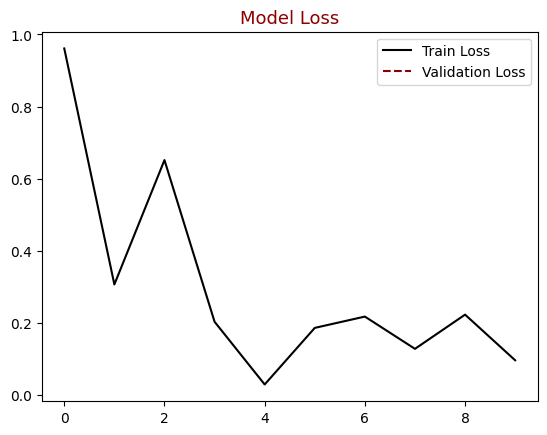

In [47]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

<a id = "10" ></a>
<ul>
    <li style = 'color:gray;font-size:16px'> <p style = 'font-weight:bold'> Accuracy Chart  </p> </li>
</ul> 

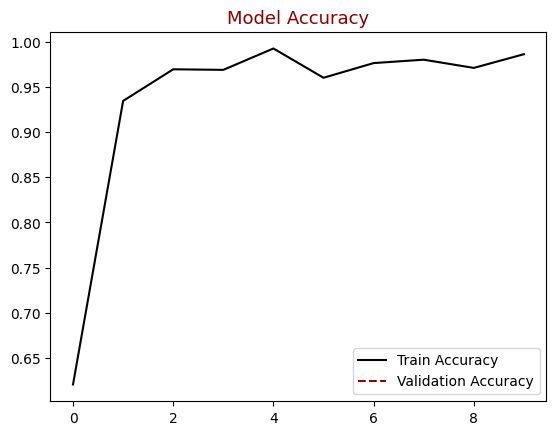

In [48]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

Prediksi

In [50]:
# Prediksi Matang
image_path = 'C:/Users/TODAY/VSCode/detection_banana/banana/test/matang/ripe_banana (17).jpg'

# Muat gambar dan ubah ukuran sesuai dengan yang diperlukan model
img = image.load_img(image_path, target_size=(150,150))  # Ganti 'your_target_size' dengan ukuran target yang digunakan pada pelatihan model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisasi nilai piksel

# Lakukan prediksi
predictions = model.predict(img_array)

# Lakukan post-processing pada hasil prediksi
predicted_class = np.argmax(predictions)
class_labels = train_generator.class_indices
predicted_label = [k for k, v in class_labels.items() if v == predicted_class][0]

# Tampilkan hasil prediksi
print("Predicted class:", predicted_label)


1/1 [==============================] - 1s 1s/step
Predicted class: matang


In [51]:
# Prediksi Mentah
image_path = 'C:/Users/TODAY/VSCode/detection_banana/banana/test/mentah/unripe_banana (1).jpg'

# Muat gambar dan ubah ukuran sesuai dengan yang diperlukan model
img = image.load_img(image_path, target_size=(150,150))  # Ganti 'your_target_size' dengan ukuran target yang digunakan pada pelatihan model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisasi nilai piksel

# Lakukan prediksi
predictions = model.predict(img_array)

# Lakukan post-processing pada hasil prediksi
predicted_class = np.argmax(predictions)
class_labels = train_generator.class_indices
predicted_label = [k for k, v in class_labels.items() if v == predicted_class][0]

# Tampilkan hasil prediksi
print("Predicted class:", predicted_label)


1/1 [==============================] - 1s 600ms/step
Predicted class: mentah


In [52]:
# Prediksi Terlalu Matang
image_path = 'C:/Users/TODAY/VSCode/detection_banana/banana/test/terlalu matang/very_ripe banana (2).jpg'

# Muat gambar dan ubah ukuran sesuai dengan yang diperlukan model
img = image.load_img(image_path, target_size=(150,150))  # Ganti 'your_target_size' dengan ukuran target yang digunakan pada pelatihan model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisasi nilai piksel

# Lakukan prediksi
predictions = model.predict(img_array)

# Lakukan post-processing pada hasil prediksi
predicted_class = np.argmax(predictions)
class_labels = train_generator.class_indices
predicted_label = [k for k, v in class_labels.items() if v == predicted_class][0]

# Tampilkan hasil prediksi
print("Predicted class:", predicted_label)


1/1 [==============================] - 0s 292ms/step
Predicted class: terlalu matang


Save Model

In [53]:
model.save('cnn_model.h5')